In [41]:
import pandas as pd
import numpy as np
data=pd.read_csv("train2.csv")
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [42]:
data.shape

(2000, 21)

# variance threshold

In [43]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split

In [44]:
x=data.drop('price_range',axis=1)
y=data.price_range

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=12)

In [46]:
var=VarianceThreshold(threshold=0.4)
fit=var.fit(x_train)

In [47]:
sum(var.get_support())

13

In [48]:
len(x_train.columns[var.get_support()])

13

In [49]:
column_state=[column for column in x_train.columns
             if column not in x_train.columns[var.get_support()]]

In [50]:
column_state

['blue', 'dual_sim', 'four_g', 'm_dep', 'three_g', 'touch_screen', 'wifi']

In [51]:
x_train=x_train.drop(column_state,axis=1)
x_test=x_test.drop(column_state,axis=1)

In [52]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
lr.score(x_test,y_test)

0.9206946543044023

# correlation using heatmap

In [53]:
df=pd.read_csv("train2.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [54]:
x=df.drop('price_range',axis=1)
y=df.price_range
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=12)

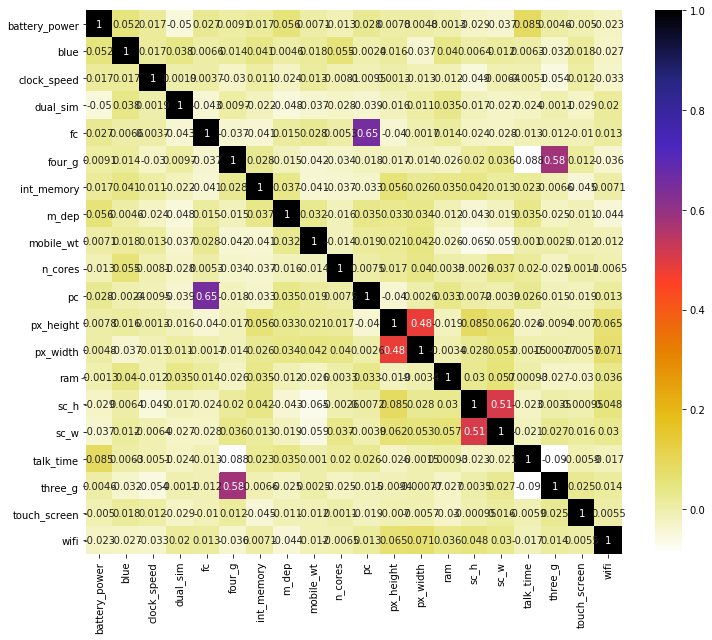

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#using pearson correlation
plt.figure(figsize=(12,10))
cor=x_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)

In [56]:
def correlation(data,threshold):
    cor_set=set()
    corr=data.corr()
    for i in range(len(corr.columns)):
        for j in range(i):
            if (corr.iloc[i,j])>threshold:
                colname=corr.columns[i]
                cor_set.add(colname)
    return cor_set

In [57]:
feat=correlation(x_train,0.5)
len(set(feat))

3

In [58]:
feat

{'pc', 'sc_w', 'three_g'}

In [59]:
x_train=x_train.drop(feat,axis=1)
x_test=x_test.drop(feat,axis=1)

In [60]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [61]:
y_pred=lr.predict(x_test)

In [62]:
lr.score(x_test,y_test)

0.9211886353168038

In [63]:
x_train.shape

(1400, 17)